## Ex.1 Visualizing data from "Titanic" dataset

*3 points*

This exercise is based on dataset from the legendary [Kaggle](kaggle.com) Titanic ML competition avaiable [here](https://www.kaggle.com/competitions/titanic/overview).

Data and their description can be downloaded from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).




#### 1.1 Import the necessary libraries

In [214]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#### 1.2 Import the dataset from [here](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [215]:
df = pd.read_csv('train__2_.csv')

#### 1.3  Set PassengerId as the index

In [216]:
df.set_index("PassengerId", inplace = True)

df[1:2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### 1.4 Create a pie chart presenting the male/female proportion

* for all passangers
* for surviving passengers

What is your conclusion?


([<matplotlib.patches.Wedge at 0x7f3716d6ac50>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

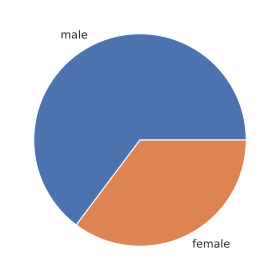

In [217]:
plt.pie(df["Sex"].value_counts(), labels = ["male", "female"])

#### 1.5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

[]

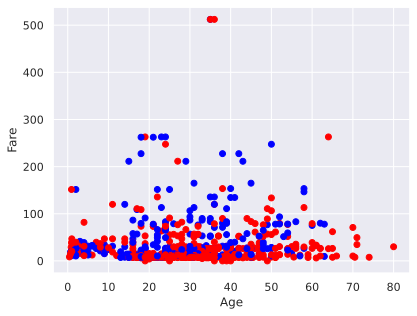

In [218]:
dic = {
    "male": "red",
    "female": "blue"
}

age = np.array(df["Age"])
fare = np.array(df["Fare"])
color = np.array(list(dic[i] for i in df["Sex"]))


# blue for female and red for male

plt.scatter(df["Age"], df["Fare"], c = color)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.plot()

Which chart would be more clear in your opinion?

#### 1.6 How many men older 45 survived?

In [219]:
df[(df["Sex"] == "male") & (df["Age"] > 45) & (df["Survived"] == 1)].describe().count()

Survived    8
Pclass      8
Age         8
SibSp       8
Parch       8
Fare        8
dtype: int64

#### 1.7  Create a histogram with the Fare payed

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

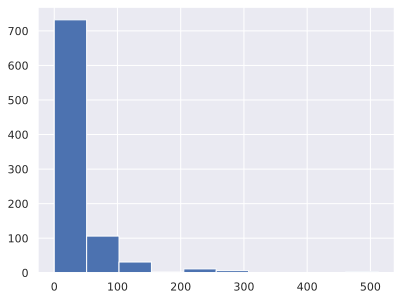

In [220]:
plt.hist(df["Fare"])

#### 1.8 Сreate your own chart that you think would be useful

[Text(0, 0.5, 'Fare'), Text(0.5, 0, 'Age')]

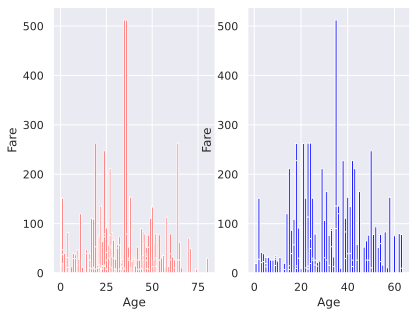

In [221]:
agem = np.array((df[(df["Sex"] == 'male')]["Age"]))
farem = np.array((df[(df["Sex"] == 'male')]["Fare"]))

agefm = np.array((df[(df["Sex"] == 'female')]["Age"]))
farefm = np.array((df[(df["Sex"] == 'female')]["Fare"]))

# # blue for female and red for male
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set(ylabel = "Fare", xlabel = 'Age')
ax1.bar(agem, farem, color = "red")

ax2.bar(agefm, farefm, color = "blue")
ax2.set(ylabel = "Fare", xlabel = 'Age')

So, I hope this simple exercise did not cause you any difficulties. Time to move on to the next task. There is no longer any instruction on what charts to draw. You must decide for yourself

## Ex.2 Visualizing data from "Hose Prices" dataset

*7 points*

With 79 independent variables describing (nearly) every aspect of residential buildings in Ames, Iowa, this competition challenges you to predict the final price of each home.

In the very first step of your analysis, you need to
1. define the type of variab-les
2. visualize data
3. which variables do you think would be useful to transform?

The data and their description are [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [222]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [223]:
df = pd.read_csv('train.csv')

In [228]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/tmp/ipykernel_18038/982485851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

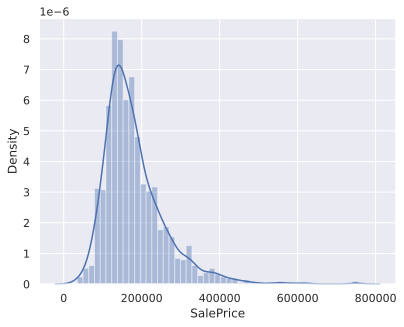

In [230]:
features = ["SalePrice", "SaleCondition"]
sns.distplot(df["SalePrice"])

<Axes: xlabel='SalePrice'>

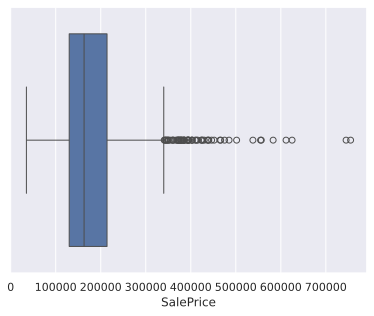

In [231]:
sns.boxplot(x="SalePrice", data=df)